# Data Preparation

In [1]:
# import necessary libraries to get the data
# import requests
# import html5lib
# from bs4 import BeautifulSoup as bs
from nltk.tokenize import sent_tokenize
import pandas as pd

In [14]:
# in case we need to download NLTK punctuations
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/flaster/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Preprocessing

In [4]:
text_ready = '''SUMEDANG, KOMPAS.com - Kasus Demam Berdarah Dengue ( DBD) di Kabupaten Sumedang, Jawa Barat, lebih tinggi dari kasus virus corona atau Covid-19. Data dari Dinas Kesehatan Kabupaten Sumedang, sejak Januari hingga April 2020, tercatat sudah ada 254 kasus DBD, dengan dua kematian. Sedangkan, kasus Covid-19 di Kabupaten Sumedang, hingga saat ini, Minggu (30/5/2020), sumedang ada 12 kasus, dengan nol kematian. Kepala Bidang Pengendalian dan Pemberantasan Penyakit (P2P) Dinas Kesehatan Kabupaten Sumedang dr. Reny K Anton mengatakan, kasus DBD tertinggi terjadi pada Maret dengan 114 kasus. "Sebelumnya pada Februari ada 2 orang meninggal dunia karena DBD," ujar Reny kepada Kompas.com melalui pesan singkat, Minggu (31/5/2020). Reny menuturkan, kasus DBD paling tinggi terdapat di tiga wilayah kecamatan yaitu di Sumedang Selatan, Tanjungsari, dan Jatinangor. Reny menyebutkan, Dinas Kesehatan Kabupaten Sumedang terus berupaya menurunkan angka kematian akibat DBD ini.
'''

In [5]:
text_ready

'SUMEDANG, KOMPAS.com - Kasus Demam Berdarah Dengue ( DBD) di Kabupaten Sumedang, Jawa Barat, lebih tinggi dari kasus virus corona atau Covid-19. Data dari Dinas Kesehatan Kabupaten Sumedang, sejak Januari hingga April 2020, tercatat sudah ada 254 kasus DBD, dengan dua kematian. Sedangkan, kasus Covid-19 di Kabupaten Sumedang, hingga saat ini, Minggu (30/5/2020), sumedang ada 12 kasus, dengan nol kematian. Kepala Bidang Pengendalian dan Pemberantasan Penyakit (P2P) Dinas Kesehatan Kabupaten Sumedang dr. Reny K Anton mengatakan, kasus DBD tertinggi terjadi pada Maret dengan 114 kasus. "Sebelumnya pada Februari ada 2 orang meninggal dunia karena DBD," ujar Reny kepada Kompas.com melalui pesan singkat, Minggu (31/5/2020). Reny menuturkan, kasus DBD paling tinggi terdapat di tiga wilayah kecamatan yaitu di Sumedang Selatan, Tanjungsari, dan Jatinangor. Reny menyebutkan, Dinas Kesehatan Kabupaten Sumedang terus berupaya menurunkan angka kematian akibat DBD ini.\n'

# Labelling

In [2]:
annotations = sorted(['lokasi', 'penyakit', 'waktu', 'korban'])
annotations

['korban', 'lokasi', 'penyakit', 'waktu']

In [3]:
from BIOtagging import text_to_tagReadyDF, convert_to_spaCyformat

In [4]:
tagready_df = text_to_tagReadyDF('labeldata_evaluate.csv')

99it [00:07, 12.59it/s]


In [5]:
print(tagready_df.shape)
tagready_df.head()

(1068, 198)


,token_0,BIO_tag_0,token_1,BIO_tag_1,token_2,BIO_tag_2,token_3,BIO_tag_3,token_4,BIO_tag_4,...,token_94,BIO_tag_94,token_95,BIO_tag_95,token_96,BIO_tag_96,token_97,BIO_tag_97,token_98,BIO_tag_98
0,SEMARANG,,ENDE,,SEMARANG,,BEKASI,,BOGOR,,...,BANGKALAN,,TANGERANG,,SURABAYA,,Di,O,MEDAN,
1,",",O,",",O,",",O,",",O,",",O,...,",",O,",",O,",",O,,O,",",O
2,,O,,O,,O,,O,,O,...,,O,,O,,O,Jawa,,,O
3,KOMPAS.com,,KOMPAS.com,,KOMPAS.com,,KOMPAS.com,,KOMPAS.com,,...,KOMPAS.com,,KOMPAS.com,,KOMPAS.com,,,O,KOMPAS.com,
4,,O,,O,,O,,O,,O,...,,O,,O,,O,Timur,,,O


In [6]:
link_for_save = "labeldata_evaluate_ready_to_tagged.csv"
tagready_df.to_csv(link_for_save, index=False)

In [4]:
# import BIO-tagged csv file
link_BIOtagged_file = "labeldata_evaluate_tagged_done_lite_10.csv"
df_tagged = pd.read_csv(link_BIOtagged_file)

In [5]:
print(df_tagged.shape)
df_tagged.head()
# bool_series = pd.isnull(df_tagged["token_0"])
# df_tagged[bool_series]

(661, 10)


,token_0,BIO_tag_0,token_1,BIO_tag_1,token_2,BIO_tag_2,token_3,BIO_tag_3,token_4,BIO_tag_4
0,SEMARANG,b-lokasi,ENDE,b-lokasi,SEMARANG,b-lokasi,BEKASI,b-lokasi,BOGOR,b-lokasi
1,",",O,",",O,",",O,",",O,",",O
2,,O,,O,,O,,O,,O
3,KOMPAS.com,O,KOMPAS.com,O,KOMPAS.com,O,KOMPAS.com,O,KOMPAS.com,O
4,,O,,O,,O,,O,,O


In [6]:
train_data = convert_to_spaCyformat(df_tagged, annotations)

start1 0
start1 39
start1 64
start1 76
start1 135
start1 425
start1 447
start1 471
start1 483
start1 579
start1 614
start1 650
start1 671
start1 703
start1 724
start1 761
start1 829
start1 861
start1 932
start1 992
start1 1039
start1 1129
start1 1166
start1 1300


In [7]:
    train_data

["SEMARANG, KOMPAS.com - Dinas Kesehatan Jawa Tengah menyebut ada 40 orang di Jawa Tengah yang meninggal dunia akibat terserang penyakit demam berdarah dengue (DBD) selama kurun waktu tiga bulan terakhir. Ancaman penyakit yang disebabkan oleh gigitan nyamuk Aedes aegypty itu menunjukkan angka kematian yang lebih tinggi dibandingkan Covid-19 di periode yang sama. Kepala Dinkes Jateng Yulianto Prabowo menyebutkan, di wilayah Jawa Tengah ditemukan demam berdarah sebanyak 2.115 kasus DBD yang tersebar merata di 35 kabupaten/kota. ``Kasus paling banyak ditemukan di Cilacap yakni 216, dengan jumlah meninggal dunia 3 orang. Lalu, Kota Semarang dengan 154 kasus, meninggal 2 orang. Kemudian Jepara dengan 136 kasus, meninggal 1 orang,' ujar Yulianto di Semarang, Kamis (16/4/2020). Lebih lanjut, jumlah warga yang terserang DBD di Kabupaten Banjarnegara mencapai 62 orang, 3 di antaranya meninggal dunia. Sedangkan, Banyumas terdapat 132 kasus, 3 orang di antaranya meninggal dunia. Klaten ada 131 ka

# Training

In [8]:
# import the function to train using spaCy
from train_spacy import train_spacy

In [9]:
# training model
model, loss = train_spacy([train_data], 100)

/home/flaster/venv/venv-project/lib/python3.6/site-packages/spacy/language.py:639: UserWarning: [W033] Training a new parser or NER using a model with no lexeme normalization table. This may degrade the performance of the model to some degree. If this is intentional or the language you're using doesn't have a normalization table, please ignore this warning. If this is surprising, make sure you have the spacy-lookups-data package installed. The languages with lexeme normalization tables are currently: da, de, el, en, id, lb, pt, ru, sr, ta, th.
  **kwargs


Starting iteration 0


/home/flaster/venv/venv-project/lib/python3.6/site-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "MATARAM, KOMPAS.com - Kepala Dinas Kesehatan Nusa ..." with entities "[(0, 7, 'lokasi'), (45, 64, 'lokasi'), (66, 69, 'l...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  gold = GoldParse(doc, **gold)


{'ner': 12963.334655761719}
Starting iteration 1
{'ner': 13106.626525878906}
Starting iteration 2
{'ner': 12614.712219238281}
Starting iteration 3
{'ner': 11146.263671875}
Starting iteration 4
{'ner': 7236.032020568848}
Starting iteration 5
{'ner': 2682.406234741211}
Starting iteration 6
{'ner': 2423.6400756835938}
Starting iteration 7
{'ner': 2434.954469680786}
Starting iteration 8
{'ner': 2447.764591217041}
Starting iteration 9
{'ner': 2485.5803298950195}
Starting iteration 10
{'ner': 2380.613140106201}
Starting iteration 11
{'ner': 2298.9348678588867}
Starting iteration 12
{'ner': 2164.181558609009}
Starting iteration 13
{'ner': 2499.884006500244}
Starting iteration 14
{'ner': 2418.7213020324707}
Starting iteration 15
{'ner': 2433.869336128235}
Starting iteration 16
{'ner': 2075.7830848693848}
Starting iteration 17
{'ner': 2108.548988342285}
Starting iteration 18
{'ner': 2035.8463249206543}
Starting iteration 19
{'ner': 1966.3463020324707}
Starting iteration 20
{'ner': 1774.17808818

In [10]:
from matplotlib import pyplot as plt

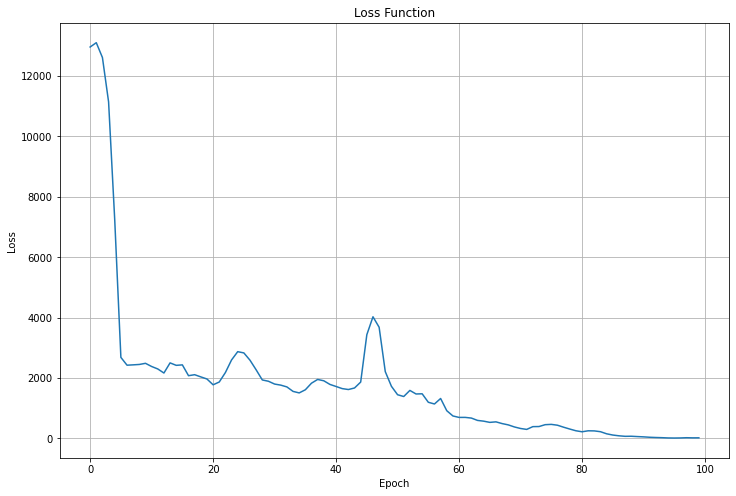

In [11]:
plt.figure(figsize=(12,8))
plt.plot([i['ner'] for i in loss])
plt.grid()
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
# Save our trained model
# link_save_model = "/"
# modelfile = input("Enter your Model Name: ")
model.to_disk("finalModel1")

# Evaluation

In [8]:
# import package for displaying NER results
from spacy import load, displacy

In [9]:
# import model
link_to_model = "finalModel1"
loaded_model = load(link_to_model)

In [3]:
# text source: 'https://www.antaranews.com/berita/1584798/erick-tetapkan-akhlak-sebagai-core-value-bumn'
test_text = """KARAWANG, KOMPAS.com - Kasus Demam Berdarah Dengue (DBD) dan kusta di Karawang pada April 2020 sebanyak 154 orang. Meningkat tiga kali lipat dari Maret 2020. Hal itu dikatakan Pelaksana tugas (Plt) Kepala Dinas Kesehatan Kabupaten Karawang Nanik Jojana. Ia mengatakan, kasus DBD di Karawang sepanjang Januari hingga April 2020 cenderung meningkat. "Januari ada 18, Februari ada 47, Maret 45, dan April sangat tinggi,154. (Sementara) Mei saya belum tahu ada berapa tapi meninggal satu," kata Nanik di Posko Gugus Tugas Percepatan Penanganan Covid-19 Karawang, Senin (11/5/2020)."""

In [5]:
from entities_option import get_entity_options
options = get_entity_options()

In [6]:
doc = loaded_model(test_text)
displacy.render(doc, style="ent", options = options)

In [37]:
test_text

'KARAWANG, KOMPAS.com - Kasus Demam Berdarah Dengue (DBD) di Karawang pada April 2020 sebanyak 154 orang. Meningkat tiga kali lipat dari Maret 2020. Hal itu dikatakan Pelaksana tugas (Plt) Kepala Dinas Kesehatan Kabupaten Karawang Nanik Jojana. Ia mengatakan, kasus DBD di Karawang sepanjang Januari hingga April 2020 cenderung meningkat. "Januari ada 18, Februari ada 47, Maret 45, dan April sangat tinggi,154. (Sementara) Mei saya belum tahu ada berapa tapi meninggal satu," kata Nanik di Posko Gugus Tugas Percepatan Penanganan Covid-19 Karawang, Senin (11/5/2020).'

In [17]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

print("\n =============== \n")
lokasi = [] 
korban = []
penyakit = []
waktu = []
for ent in doc.ents:
    if ent.label_ == "lokasi":
#         print("True")
        lokasi.append(str(ent.text))
    elif ent.label_ == "korban":
        korban.append(str(ent.text))
    elif ent.label_ == "penyakit":
        penyakit.append(str(ent.text))
    elif ent.label_ == "waktu":
        waktu.append(str(ent.text))

print("\nini lokasi\n", lokasi)
print("\nini korban\n", korban)
print("\nini penyakit\n", penyakit)
print("\nini waktu\n", waktu)

KARAWANG 0 8 lokasi
Kasus 23 28 korban
Demam Berdarah Dengue 29 50 penyakit
DBD 52 55 penyakit
kusta 61 66 penyakit
Karawang 70 78 lokasi
154 orang 104 113 korban
Kabupaten Karawang 221 239 lokasi
kasus 269 274 korban
DBD 275 278 penyakit
Karawang 282 290 lokasi
18 361 363 korban
47 378 380 korban
45 388 390 korban
Karawang 549 557 lokasi
11/5/2020 566 575 waktu



ini lokasi
 ['KARAWANG', 'Karawang', 'Kabupaten Karawang', 'Karawang', 'Karawang']

ini korban
 ['Kasus', '154 orang', 'kasus', '18', '47', '45']

ini penyakit
 ['Demam Berdarah Dengue', 'DBD', 'kusta', 'DBD']

ini waktu
 ['11/5/2020']


In [39]:
doc

KARAWANG, KOMPAS.com - Kasus Demam Berdarah Dengue (DBD) di Karawang pada April 2020 sebanyak 154 orang. Meningkat tiga kali lipat dari Maret 2020. Hal itu dikatakan Pelaksana tugas (Plt) Kepala Dinas Kesehatan Kabupaten Karawang Nanik Jojana. Ia mengatakan, kasus DBD di Karawang sepanjang Januari hingga April 2020 cenderung meningkat. "Januari ada 18, Februari ada 47, Maret 45, dan April sangat tinggi,154. (Sementara) Mei saya belum tahu ada berapa tapi meninggal satu," kata Nanik di Posko Gugus Tugas Percepatan Penanganan Covid-19 Karawang, Senin (11/5/2020).

In [3]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

In [14]:
def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot)
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [18]:
examples = [
    ('KARAWANG, KOMPAS.com  Kasus Demam Berdarah Dengue (DBD) di Karawang pada April 2020 sebanyak 154 orang. Meningkat tiga kali lipat dari Maret 2020. Hal itu dikatakan Pelaksana tugas (Plt) Kepala Dinas Kesehatan Kabupaten Karawang Nanik Jojana. Ia mengatakan, kasus DBD Senin (11/5/2020).',
     [(0, 8, 'lokasi'), (22, 27, 'korban'), (28, 49, 'penyakit'), (51, 54, 'penyakit'), (60, 65, 'penyakit'), (69, 77, 'lokasi'), (103, 112, 'korban'), (220, 238, 'lokasi'), (274, 277, 'penyakit')])
]

In [29]:
examplesLite = [
    ('aku tinggal di bandung',
     [(16, 22, 'lokasi')])
]
GOLD = [
    ("aku tinggal di bandung", {"entities": [(16, 22, "lokasi")]}),
]

In [30]:
results = evaluate(loaded_model, GOLD)

IndexError: list index out of range

In [28]:
results

{'uas': 0.0,
 'las': 0.0,
 'las_per_type': {'': {'p': 0.0, 'r': 0.0, 'f': 0.0}},
 'ents_p': 0.0,
 'ents_r': 0.0,
 'ents_f': 0.0,
 'ents_per_type': {},
 'tags_acc': 0.0,
 'token_acc': 100.0,
 'textcat_score': 0.0,
 'textcats_per_cat': {}}